# Optimal Skills
## What is the most optimal skill to learn for Data Analysts ?
### Methodology
1) Group skills to determine median salary and likelihood of being in posting
2) Visualize median salary vs percent skill demand
3) Determine if certain technologies are more relevant

In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [4]:
df_DA_US= df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US_exploded = df_DA_US.explode('job_skills')
df_DA_US_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
1681,111175.0,sql
1681,111175.0,tableau
1681,111175.0,power bi
1681,111175.0,excel
3237,120000.0,sql


In [8]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count','median':'median_salary'})
DA_job_count = len(df_DA_US)
df_DA_skills['skill_percent'] = (df_DA_skills['skill_count'] / DA_job_count)*100
df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]
df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,714,87500.0,63.864043
excel,472,77500.0,42.218247
python,408,90000.0,36.493739
tableau,398,90000.0,35.599284
power bi,279,87500.0,24.955277
...,...,...,...
django,1,82500.0,0.089445
bitbucket,1,111175.0,0.089445
node,1,65000.0,0.089445


## Median Salary VS Percent Skill Demand

In [9]:
skill_limit = 5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

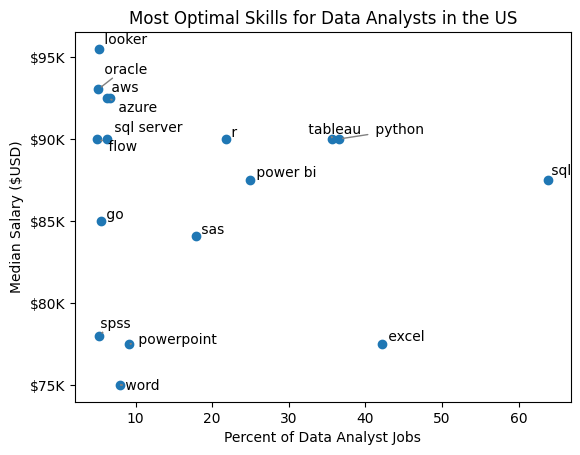

In [12]:
from adjustText import adjust_text
plt.scatter(df_DA_skills_high_demand['skill_percent'],df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
plt.show()

In [13]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['tableau',
  'spss',
  'excel',
  'sharepoint',
  'microstrategy',
  'sheets',
  'ssrs',
  'sas',
  'looker',
  'msaccess',
  'cognos',
  'esquisse',
  'qlik',
  'alteryx',
  'spreadsheet',
  'ssis',
  'power bi',
  'powerbi',
  'visio',
  'datarobot',
  'ms access',
  'splunk',
  'nuix',
  'powerpoint',
  'sap',
  'word',
  'dax',
  'outlook'],
 'programming': ['f#',
  'vba',
  'css',
  'r',
  'mongo',
  'erlang',
  'pascal',
  'no-sql',
  'clojure',
  'mongodb',
  'ruby',
  'lisp',
  'sas',
  'cobol',
  'golang',
  'objective-c',
  'python',
  'swift',
  't-sql',
  'visual basic',
  'apl',
  'kotlin',
  'vb.net',
  'java',
  'dart',
  'c#',
  'fortran',
  'ocaml',
  'haskell',
  'delphi',
  'assembly',
  'perl',
  'matlab',
  'rust',
  'php',
  'bash',
  'sass',
  'julia',
  'nosql',
  'scala',
  'javascript',
  'elixir',
  'html',
  'go',
  'groovy',
  'sql',
  'powershell',
  'lua',
  'c++',
  'shell',
  'solidity',
  'typescript',
  'visualbasic',
  'crystal',
 

In [14]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,tableau
0,analyst_tools,spss
0,analyst_tools,excel
0,analyst_tools,sharepoint
0,analyst_tools,microstrategy
...,...,...
9,sync,wire
9,sync,google chat
9,sync,zoom
9,sync,microsoft teams


In [15]:
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')
df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,714,87500.0,63.864043,programming,sql
1,472,77500.0,42.218247,analyst_tools,excel
2,408,90000.0,36.493739,programming,python
3,398,90000.0,35.599284,analyst_tools,tableau
4,279,87500.0,24.955277,analyst_tools,power bi
...,...,...,...,...,...
142,1,82500.0,0.089445,webframeworks,django
143,1,111175.0,0.089445,other,bitbucket
144,1,65000.0,0.089445,webframeworks,node
145,1,83500.0,0.089445,webframeworks,node.js


In [16]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]

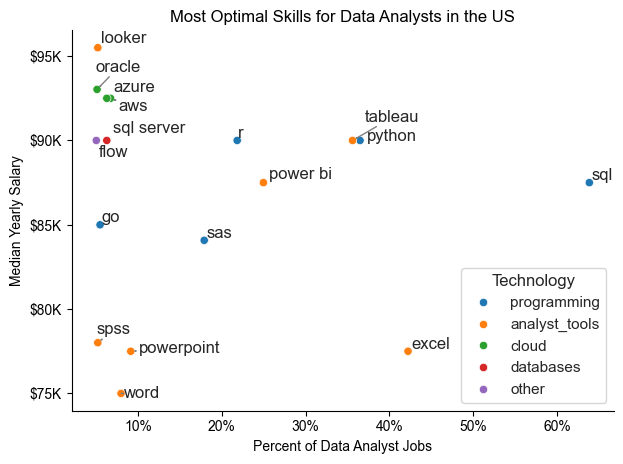

In [17]:
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()